<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression-example" data-toc-modified-id="Regression-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regression example</a></span></li><li><span><a href="#Recreating-using-Scikit-Learn" data-toc-modified-id="Recreating-using-Scikit-Learn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Recreating using Scikit-Learn</a></span><ul class="toc-item"><li><span><a href="#First-using-the-root-mean-square-error-in-the-loss-function" data-toc-modified-id="First-using-the-root-mean-square-error-in-the-loss-function-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>First using the root mean square error in the loss function</a></span></li><li><span><a href="#Try-with-different-metric---the-one-norm-(or-rather-the-Mean-Absolute-Error)" data-toc-modified-id="Try-with-different-metric---the-one-norm-(or-rather-the-Mean-Absolute-Error)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Try with different metric - the one-norm (or rather the Mean Absolute Error)</a></span></li></ul></li><li><span><a href="#Recreating-using-TensorFlow" data-toc-modified-id="Recreating-using-TensorFlow-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Recreating using TensorFlow</a></span><ul class="toc-item"><li><span><a href="#First-using-the-root-mean-square-error-in-the-loss-function" data-toc-modified-id="First-using-the-root-mean-square-error-in-the-loss-function-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>First using the root mean square error in the loss function</a></span></li><li><span><a href="#Try-with-different-metric---the-one-norm-(or-rather-the-Mean-Absolute-Error)" data-toc-modified-id="Try-with-different-metric---the-one-norm-(or-rather-the-Mean-Absolute-Error)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Try with different metric - the one-norm (or rather the Mean Absolute Error)</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
%precision 6
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

## Regression example

Here we compare our linear regression results obtained using an optimisation algorithm applied to different misfit functions (which we saw in lectures 4 and 5) with results obtained using SKLearn and TensorFlow.

Note that the TF code below is based on <https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/programming-exercises>

First let's repeat the linear regression seen in lectures.

Note I'm using random data, so if you compate your results against mine, or your colleagues, then you will expect to see slightly different results.

In [2]:
# Invent some raw data - we will use the notation (xi,yi) for the
# given data, where xi and yi are of length N+1 (N=len(xi)-1)


#xi = np.linspace(0,1,10)
#yi = xi +  0.2 * np.random.random((10,))

In [3]:
xi = np.linspace(0,1,10)
yi = np.array([0.032965, 0.248166, 0.421453, 0.38419, 0.620941, 0.692105, 0.733999, 0.873669, 1.031932, 1.133736])

print(xi)
print(yi)

[0.       0.111111 0.222222 0.333333 0.444444 0.555556 0.666667 0.777778
 0.888889 1.      ]
[0.032965 0.248166 0.421453 0.38419  0.620941 0.692105 0.733999 0.873669
 1.031932 1.133736]


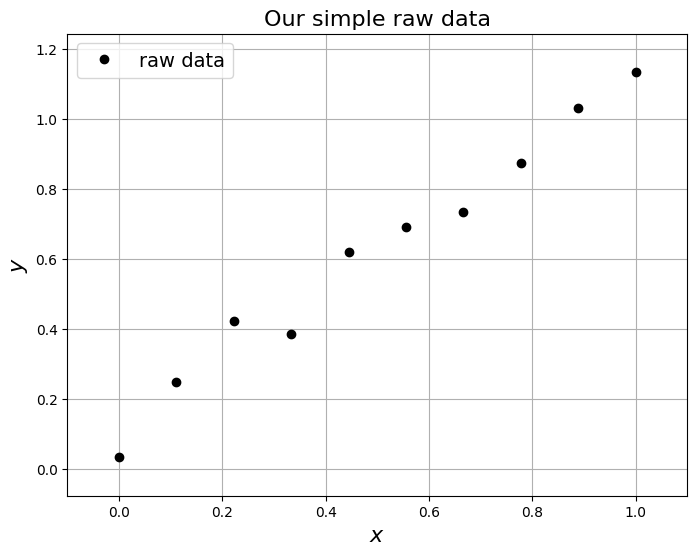

In [4]:
# We will want to overlay a plot of the raw data a few times below so 
# let's do this via a function that we can call repeatedly
# [Note that I've been a bit lazy in later lectures and really should
# do this sort of thing more often to make code easier to read - apologies]
def plot_raw_data(xi, yi, ax):
    """Plot x vs y on axes ax, 
    add axes labels and turn on grid

    Parameters
    ----------
    xi : array_like
        Array containing x data
    yi : array_like
        Array containing y data
    ax :  matplotlib axes, optional
        The axes to plot on
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)


# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# For clarity we are going to add a small margin to all the plots.
ax1.margins(0.1)

# plot the raw data
plot_raw_data(xi, yi, ax1)

# add a figure title
ax1.set_title('Our simple raw data', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);
# loc='best' means we let matplotlib decide the best place for the
# legend to go.  For other options see 
#  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

poly_coeffs:  [1.024089 0.105271]


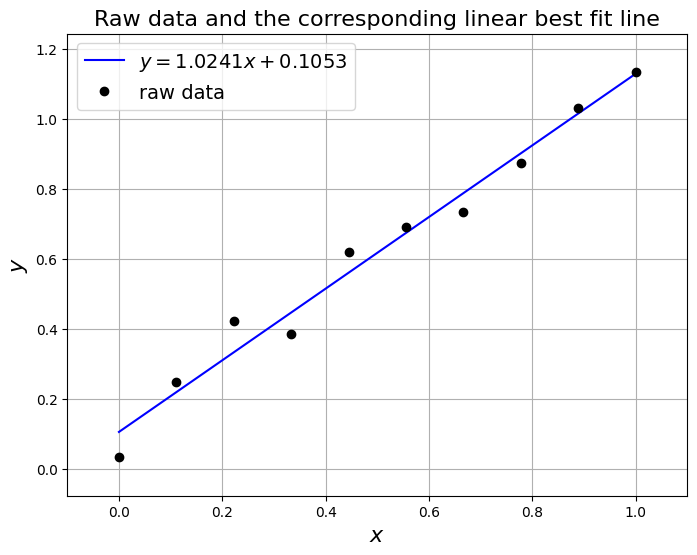

In [5]:
# Fit a polynomial of degree 1, i.e. a straight line, to our (xi, yi) data from above
# we'll explain what's going on here later in this lecture
degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
print('poly_coeffs: ',poly_coeffs)

# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Plot the linear fit - define 100 evenly spaced points (x) covering our
# x extent and plot our linear polynomial evaluated at these points (p1(x))
# of course 100 is overkill for this linear example
x = np.linspace(0., 1, 100)

ax1.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))

# Overlay raw data
plot_raw_data(xi, yi, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=14)

# add a figure title
ax1.set_title('Raw data and the corresponding linear best fit line', fontsize=16);

We have used NumPy's polynomial fitting function which "minimises the squared error" <https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html>

i.e. it seeks the polynomial (here we chose just a straight line) which minimises the two-norm of the errors at the locations where we have data.

[Don't worry about the details too much here, we'll go over these methods in detail in later lectures].


We can code this up ourselves using SciPy, and in doing so check that our code recreates above when we choose the two-norm, but also see what happens if we select other norms with which to define the best fitting line - we need to code it up ourselves to allow us to change the norm!

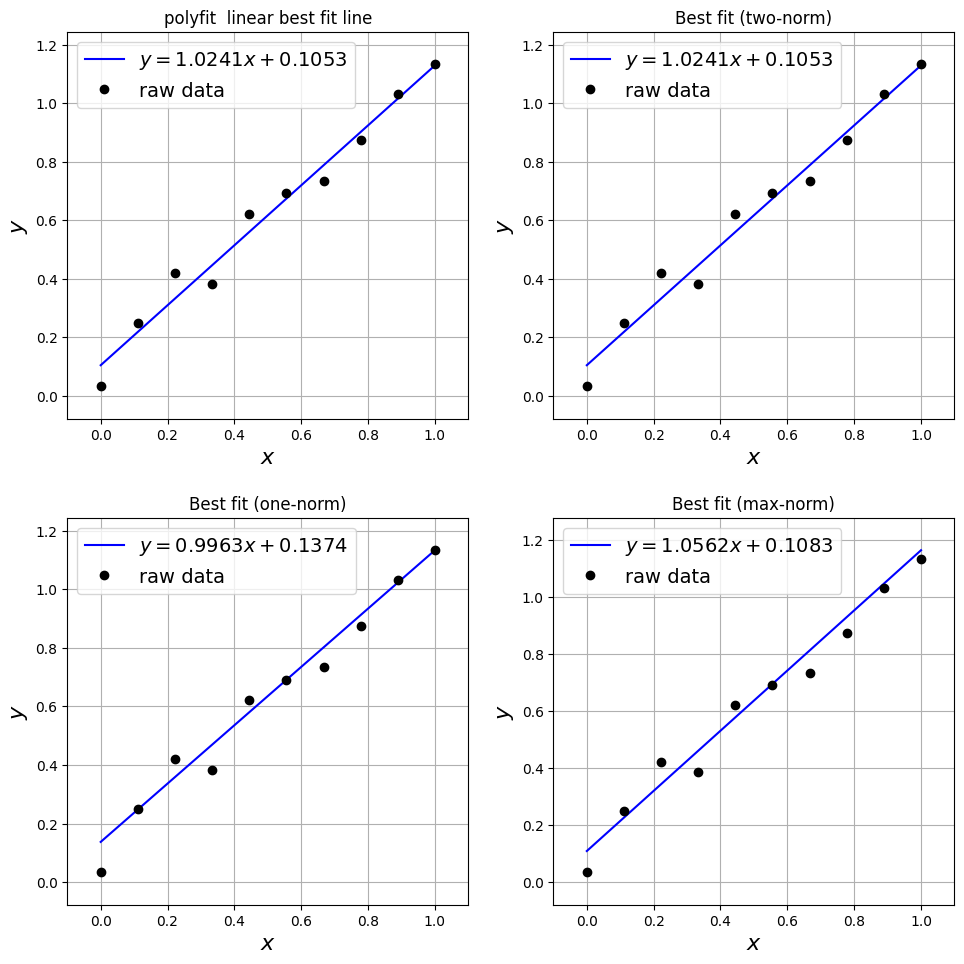

In [6]:
from scipy.optimize import minimize

def line_fit(x, line_coeffs):
    """
    Calculate y values for a given line and given x values

    Parameters
    ----------
    x : array_like
        Array containing x data
    line_coeffs : array_like
        Array containing gradient and constant

    """
    return line_coeffs[0]*x + line_coeffs[1]

def cost_fun(line_coeffs, x, y, norm):
    """Cost function using two, one or max-norm

    Parameters
    ----------
    line_coeffs : array_like
        Array containing gradient and constant
    x : array_like
        Array containing x data
    y : array_like
        Array containing y data
    norm : string
        'two' for two-norm, 'one' for one-norm, 'max' for max-norm
    """
    if norm=='two':
        return sl.norm(y - line_fit(x, line_coeffs), 2)
    elif norm=='one':
        return sl.norm(y - line_fit(x, line_coeffs), 1)
    elif norm=='max':
        return sl.norm(y - line_fit(x, line_coeffs), np.inf)
    else:
        raise ValueError('check your norm string')

degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(10, 10))

# polyfit line
ax = fig.add_subplot(221)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('polyfit  linear best fit line', fontsize=12)
        
# minimise two-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'two'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(222)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (two-norm)', fontsize=12)

# minimise one-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'one'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(223)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (one-norm)', fontsize=12)

# minimise max-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'max'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(224)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (max-norm)', fontsize=12)


plt.tight_layout(pad = 2.0)

Note that our code recreates the `numpy.polyfit` result when we choose the two-norm. Note also that we get slightly different results when we use the one-norm or the max-norm.

These results are all equally valid. The fact that `numpy.polyfit` implements the two-norm without giving us the ability to change the norm highlights that so-called "least squares" fitting is by far the most common approach, but there may be situations where the other norms are beneficial.

Let's see what happens when we perturb a single entry - this is motivated by a situation where maybe one of our sensors failed and gave a spurious result.

error in RMS case:  0.2760004396984354
error in two-norm case:  0.8727900246550135
and if we divide this by sqrt(N) to turn this into an RMS error:  0.2760004396984358
error in one-norm case:  1.3775873491354287
and if we divide this by N to turn this into a MAE:  0.13775873491354287
error in inf-norm case:  0.5075188478637849


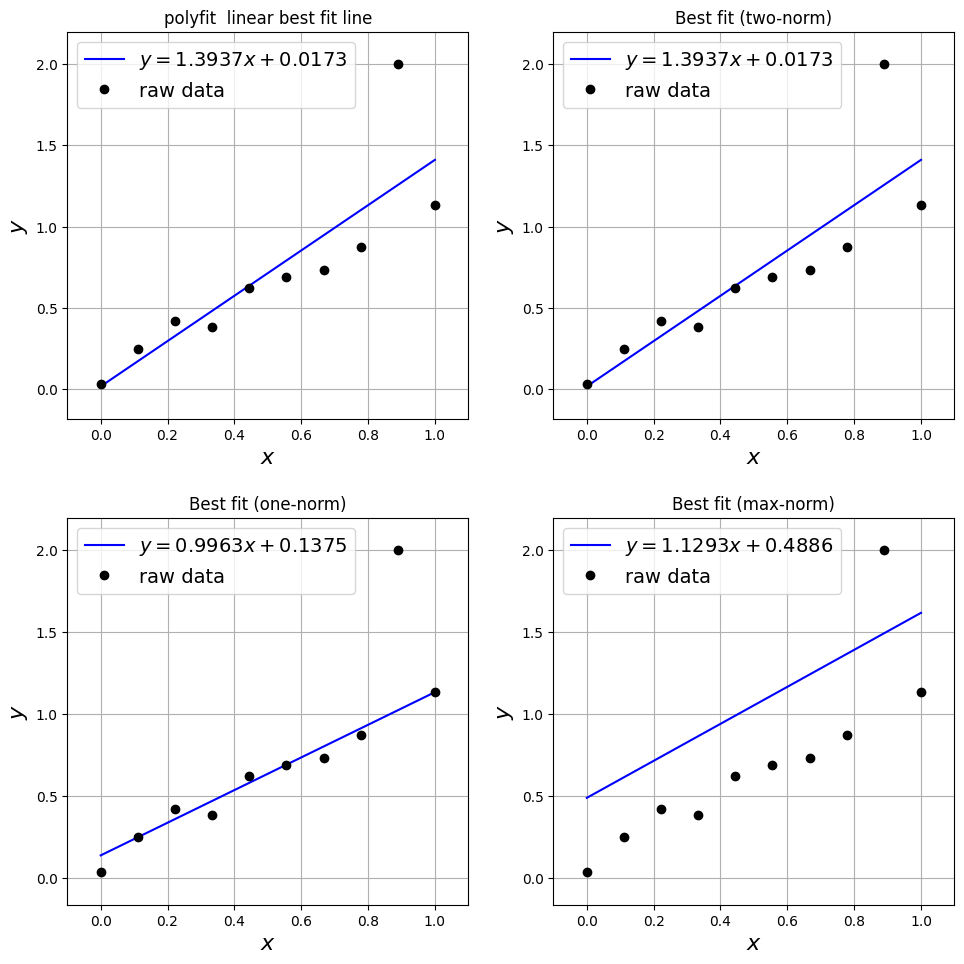

In [7]:
# perturb one of the entries - imagine it's corrupted or subject to major measurement error

yi[8] = 2.

degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(10, 10))

# polyfit line
ax = fig.add_subplot(221)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('polyfit  linear best fit line', fontsize=12)
# print out the error
print('error in RMS case: ', sl.norm(yi - p1(xi)) / np.sqrt(len(yi)))

# minimise two-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'two'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(222)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (two-norm)', fontsize=12)
# print out the error
print('error in two-norm case: ', sl.norm(yi - p1(xi), 2))
print('and if we divide this by sqrt(N) to turn this into an RMS error: ', sl.norm(yi - p1(xi), 2)/np.sqrt(len(xi)) )

# minimise one-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'one'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(223)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (one-norm)', fontsize=12)
# print out the error
print('error in one-norm case: ', sl.norm(yi - p1(xi), 1))
print('and if we divide this by N to turn this into a MAE: ', sl.norm(yi - p1(xi), 1)/(len(xi)) )

# minimise max-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'max'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(224)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (max-norm)', fontsize=12)
# print out the error
print('error in inf-norm case: ', sl.norm(yi - p1(xi), np.inf))

plt.tight_layout(pad = 2.0)



If you compare the resulting slopes of the best fit lines, between this case with the outlier with the previous slopes without the outlier, you should see that the one-norm is by far the least impacted while the max-norm is the most impacted.

These sorts of issues will be important in the modules on **Inversion & Optimisation** and **Machine Learning**.

## Recreating using Scikit-Learn

Let's see if we can recreate the above slopes and intercept values using the Scikit-Learn library.

### First using the root mean square error in the loss function

Following <https://scikit-learn.org/stable/modules/linear_model.html>

See also <https://stackabuse.com/linear-regression-in-python-with-scikit-learn/>

In [8]:
from sklearn import linear_model
from sklearn import metrics

In [9]:
reg = linear_model.LinearRegression(fit_intercept=True)

reg.fit(xi[:, np.newaxis], yi)

print('slope: ', reg.coef_[0])
print('intercept: ', reg.intercept_)
print('MSE: ', metrics.mean_squared_error(yi, reg.predict(xi[:, np.newaxis])))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(yi, reg.predict(xi[:, np.newaxis]))))

slope:  1.3937153454545457
intercept:  0.01726472727272721
MSE:  0.07617624271372973
RMSE:  0.2760004396984355


### Try with different metric - the one-norm (or rather the Mean Absolute Error)

As described here <https://scikit-learn.org/stable/auto_examples/linear_model/plot_quantile_regression.html>

"...QuantileRegressor with quantile=0.5 minimizes the mean absolute error (MAE)..."

In [10]:
from sklearn import metrics

reg = linear_model.QuantileRegressor(fit_intercept=True, quantile=0.5, alpha=0.0)

reg.fit(xi[:, np.newaxis], yi)

print('slope: ', reg.coef_[0])
print('intercept: ', reg.intercept_)
print('MAE: ', metrics.mean_absolute_error(yi, reg.predict(xi[:, np.newaxis])))

slope:  0.9962662499448705
intercept:  0.13746975010529316
MAE:  0.13775872501677078


## Recreating using TensorFlow

Now let's see if we can get TensorFlow to recreate the "slope", "intercept" and "misfit error" in the case of the RMS or least squares error.

In the language of ML we talk about "weight", "bias" and "loss function".


### First using the root mean square error in the loss function

In [11]:
import pandas as pd

In [12]:
import tensorflow as tf

2022-10-31 14:48:56.738939: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 14:48:56.898626: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-31 14:48:56.902897: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-31 14:48:56.902920: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [13]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [14]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [15]:
#my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
#my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

my_feature = xi
my_label   = yi


2022-10-31 14:48:58.179788: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-31 14:48:58.179912: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-31 14:48:58.179961: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-502GPIH): /proc/driver/nvidia/version does not exist
2022-10-31 14:48:58.180645: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1/1 [==============================] - 0s 204ms/step - loss: 2.2916 - root_mean_squared_error: 1.5138
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 2.1585 - root_mean_squared_error: 1.4692
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 2.0664 - root_mean_squared_error: 1.4375
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 1.9919 - root_mean_squared_error: 1.4113
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 1.9277 - root_mean_squared_error: 1.3884
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 1.8703 - root_mean_squared_error: 1.3676
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 1.8179 - root_mean_squared_error: 1.3483
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 1.7694 - root_mean_squared_error: 1.3302
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 1.7240 - root_mean_squared_error: 1.3130

/home/meng-yang/miniconda3/envs/Computational-Mathematics/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


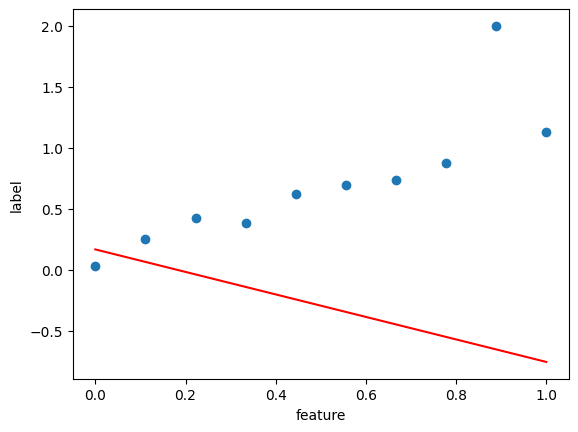

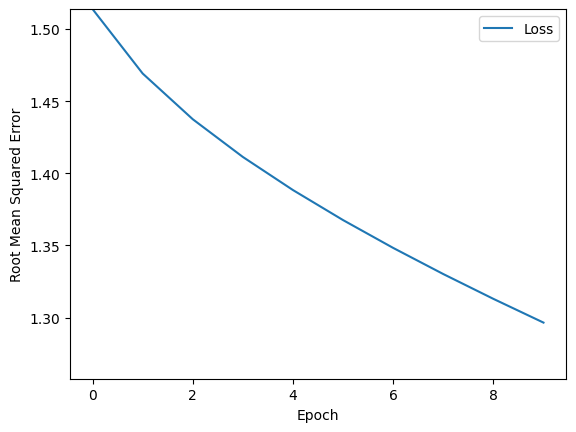

[[-0.922821]]
[0.166833]
1.29654860496521


In [16]:
learning_rate=0.01
epochs=10
my_batch_size=10

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

print(trained_weight)
print(trained_bias)
print(rmse.values[-1])

Let's see if we match the results above better if we run for more epochs and try to reduce the loss function further. 

Epoch 1/1000
1/1 [==============================] - 0s 166ms/step - loss: 0.1734 - root_mean_squared_error: 0.4164
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1597 - root_mean_squared_error: 0.3996
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1508 - root_mean_squared_error: 0.3884
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1440 - root_mean_squared_error: 0.3795
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1384 - root_mean_squared_error: 0.3721
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1337 - root_mean_squared_error: 0.3656
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1295 - root_mean_squared_error: 0.3598
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1257 - root_mean_squared_error: 0.3546
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1224 - root_mean_squ

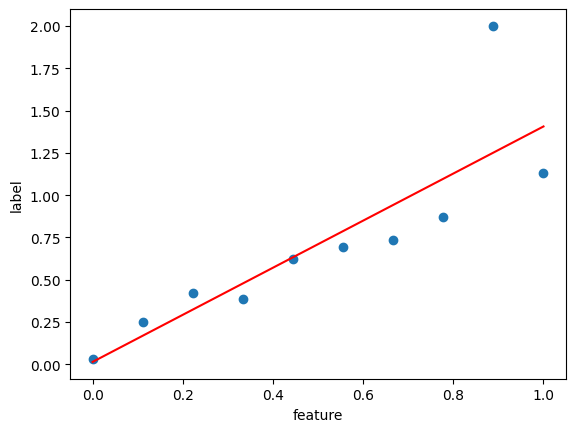

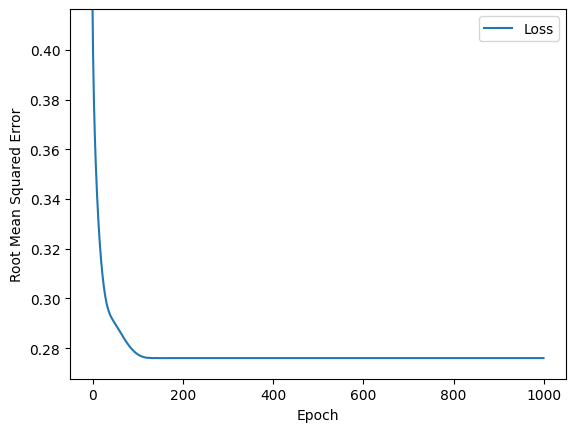

[[1.391215]]
[0.014765]
0.27602705359458923


In [17]:
learning_rate=0.005
epochs=1000
my_batch_size=10

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

print(trained_weight)
print(trained_bias)
print(rmse.values[-1])
# The loss curve suggests that the model does converge.

### Try with different metric - the one-norm (or rather the Mean Absolute Error)

Let's check our understanding by changing the "loss function", specifically the metric used to calculate the misfit to data, and confirm that we can get TensorFlow to recreate our one-norm result from above.

In [18]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_absolute_error",
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's MAE at each epoch. 
  mae = hist["mean_absolute_error"]

  return trained_weight, trained_bias, epochs, mae

print("Defined create_model and train_model")

Defined create_model and train_model


In [19]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, mae):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Absolute Error")

  plt.plot(epochs, mae, label="Loss")
  plt.legend()
  plt.ylim([mae.min()*0.97, mae.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/1000
1/1 [==============================] - 0s 196ms/step - loss: 0.4697 - mean_absolute_error: 0.4697
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.4460 - mean_absolute_error: 0.4460
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.4288 - mean_absolute_error: 0.4288
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4152 - mean_absolute_error: 0.4152
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.4052 - mean_absolute_error: 0.4052
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.3958 - mean_absolute_error: 0.3958
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.3869 - mean_absolute_error: 0.3869
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.3783 - mean_absolute_error: 0.3783
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.3701 - mean_absolute_error: 0.3701
Epoch 10/1000
1/1

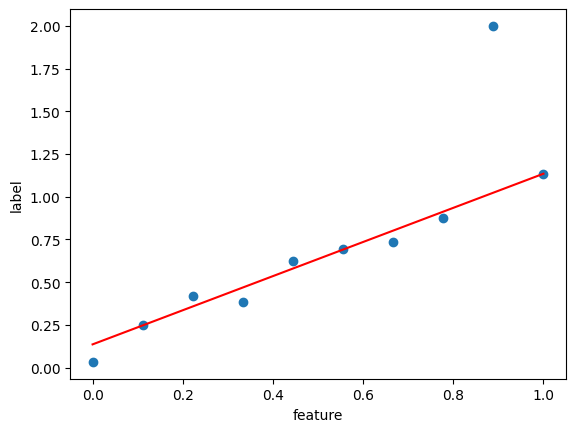

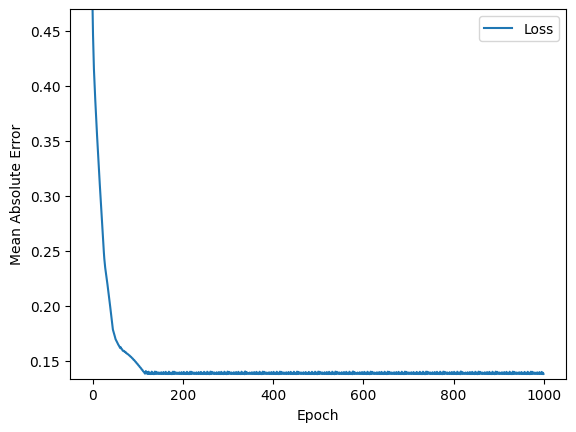

[[0.99919]]
[0.135643]
0.13803553581237793


In [20]:
learning_rate=0.005
epochs=1000
my_batch_size=10

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, mae = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, mae)

print(trained_weight)
print(trained_bias)
print(mae.values[-1])